In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-08-28 10:43:04.430287: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-28 10:43:04.454875: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 10:43:04.859537: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def create_lenet(input_shape):
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(6, kernel_size=(5, 5), activation='tanh', input_shape=input_shape))
    model.add(tf.keras.layers.AveragePooling2D((2,2),strides=2))
    model.add(tf.keras.layers.Conv2D(16, kernel_size=(5, 5), activation='tanh'))
    model.add(tf.keras.layers.AveragePooling2D((2,2),strides=2))
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [3]:
def create_alexnet(input_shape):
    model = Sequential()
    model.add(tf.keras.layers.Conv2D(96, kernel_size=(11, 11), strides=4, padding='valid', activation='relu', input_shape=input_shape))
    model.add(tf.keras.layers.MaxPooling2D((3,3),strides=2,padding='valid'))
    model.add(tf.keras.layers.Conv2D(256, kernel_size=(5, 5), activation='relu',padding='same',strides=2))
    model.add(tf.keras.layers.MaxPooling2D((3,3),strides=2,padding='valid'))
    model.add(tf.keras.layers.Conv2D(384, kernel_size=(3, 3), activation='relu',padding='same',strides=1))
    model.add(tf.keras.layers.Conv2D(384, kernel_size=(3, 3), activation='relu',padding='same',strides=1))
    model.add(tf.keras.layers.Conv2D(384, kernel_size=(3, 3), activation='relu',padding='same',strides=1))
    model.add(tf.keras.layers.MaxPooling2D((3,3),strides=2,padding='valid'))

    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    return model

In [4]:
train = tf.keras.utils.image_dataset_from_directory('data/train')

Found 2401 files belonging to 2 classes.


2023-08-28 10:43:05.564120: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-28 10:43:05.579689: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-28 10:43:05.579834: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [5]:
test = tf.keras.utils.image_dataset_from_directory('data/test')

Found 260 files belonging to 2 classes.


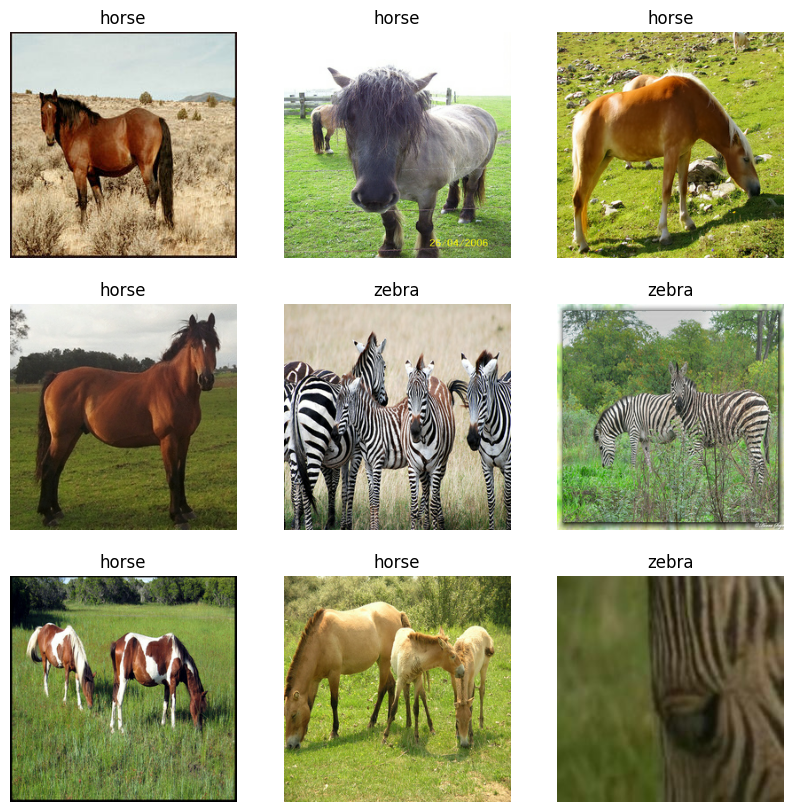

In [6]:
class_names = train.class_names
plt.figure(figsize=(10, 10))
len = 0
for images, labels in train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        len = images[i].shape
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
shape = tuple(len)

In [8]:
lenet = create_lenet(shape)
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 252, 252, 6)       456       
                                                                 
 average_pooling2d (Average  (None, 126, 126, 6)       0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 16)      2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 61, 61, 16)        0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 59536)             0         
                                                                 
 dense (Dense)               (None, 120)               7

In [9]:
alexnet = create_alexnet(shape)
alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 96)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 15, 15, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 384)         885120    
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 384)        

In [10]:
lenet.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')
alexnet.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.BinaryCrossentropy(), metrics='accuracy')

In [11]:
history = lenet.fit(train,epochs=20)

Epoch 1/20


2023-08-28 10:43:07.331952: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-08-28 10:43:07.871471: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7efaec0135f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-08-28 10:43:07.871496: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1660 Ti, Compute Capability 7.5
2023-08-28 10:43:07.875096: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-08-28 10:43:07.939877: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


76/76 [==============================] - 4s 25ms/step - loss: 0.8625 - accuracy: 0.6876
Epoch 2/20
76/76 [==============================] - 2s 24ms/step - loss: 0.4157 - accuracy: 0.8063
Epoch 3/20
76/76 [==============================] - 2s 24ms/step - loss: 0.3694 - accuracy: 0.8384
Epoch 4/20
76/76 [==============================] - 2s 24ms/step - loss: 0.3573 - accuracy: 0.8438
Epoch 5/20
76/76 [==============================] - 2s 24ms/step - loss: 0.3446 - accuracy: 0.8576
Epoch 6/20
76/76 [==============================] - 2s 24ms/step - loss: 0.3175 - accuracy: 0.8642
Epoch 7/20
76/76 [==============================] - 2s 24ms/step - loss: 0.3650 - accuracy: 0.8446
Epoch 8/20
76/76 [==============================] - 2s 24ms/step - loss: 0.2240 - accuracy: 0.9121
Epoch 9/20
76/76 [==============================] - 2s 25ms/step - loss: 0.2909 - accuracy: 0.8713
Epoch 10/20
76/76 [==============================] - 2s 24ms/step - loss: 0.1837 - accuracy: 0.9271
Epoch 11/20
76/76 [=

In [13]:
history2 = alexnet.fit(train,epochs=20)

Epoch 1/20
76/76 [==============================] - 4s 33ms/step - loss: 2.6165 - accuracy: 0.5535
Epoch 2/20
76/76 [==============================] - 2s 30ms/step - loss: 0.4854 - accuracy: 0.7684
Epoch 3/20
76/76 [==============================] - 2s 30ms/step - loss: 0.3236 - accuracy: 0.8505
Epoch 4/20
76/76 [==============================] - 2s 30ms/step - loss: 0.5507 - accuracy: 0.7534
Epoch 5/20
76/76 [==============================] - 2s 30ms/step - loss: 0.4448 - accuracy: 0.8026
Epoch 6/20
76/76 [==============================] - 2s 30ms/step - loss: 0.3477 - accuracy: 0.8405
Epoch 7/20
76/76 [==============================] - 2s 30ms/step - loss: 0.3288 - accuracy: 0.8413
Epoch 8/20
76/76 [==============================] - 2s 30ms/step - loss: 0.3007 - accuracy: 0.8617
Epoch 9/20
76/76 [==============================] - 2s 30ms/step - loss: 0.3373 - accuracy: 0.8409
Epoch 10/20
76/76 [==============================] - 2s 30ms/step - loss: 0.2728 - accuracy: 0.8821
Epoch 11/

In [15]:
test_loss, test_acc = lenet.evaluate(test,verbose=2)
print(test_acc)
test_loss, test_acc = alexnet.evaluate(tt,verbose=2)
print(test_acc)

9/9 - 0s - loss: 0.6713 - accuracy: 0.8231 - 141ms/epoch - 16ms/step
0.8230769038200378
9/9 - 0s - loss: 0.2196 - accuracy: 0.9077 - 318ms/epoch - 35ms/step
0.9076923131942749
